## Made for Practice and to find out some interesting facts. Feedback Appreciated.


**AGENDA FOR NOTEBOOK:**

1.Basic groupby observations and pandas data viz

2.Seaborn plots - distributions and categories

3.pairplots joint plots and more in-depth insights

4.Matrix plots and improving inferences

5.Plotly for interctive plotting

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt

In [5]:
df = pd.read_csv('dataset/natural-disaster-events.csv')
df.head(10)

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2
5,All natural disasters,NaN,1905,4
6,All natural disasters,NaN,1906,17
7,All natural disasters,NaN,1907,5
8,All natural disasters,NaN,1908,4
9,All natural disasters,NaN,1909,11


In [ ]:
df.info()

In [ ]:
sns.pairplot(df[['disaster_number','fy_declared','incident_type','declaration_request_number']]);

# How frequently do disasters occur statewide

In [ ]:
disaster_types = df['incident_type'].unique()
print("Types of Disasters reported:\n\n", disaster_types)
print("Occurrences:\n\n",df['incident_type'].value_counts())

plotting natural disasters over the years by count and frequency


In [ ]:
plt.pyplot.figure(figsize=(10,6))
sns.distplot(df['incident_type'].value_counts());

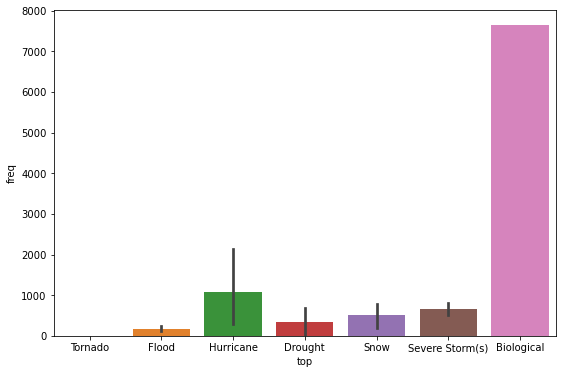

In [7]:
m=df[['fy_declared','incident_type']].groupby('fy_declared').describe()['incident_type'].reset_index()
plt.pyplot.figure(figsize=(9,6))
sns.barplot(x='top',y='freq',data =m);

In [ ]:
m=df['fy_declared'].value_counts().reset_index()
m.head(10)

In [ ]:
sns.lmplot(x='index',y='fy_declared',data=m.sort_values(by='fy_declared'),
           aspect=1.7, height=5,markers=['o'], scatter_kws={'s':20});

## To check which states are prone to what kinds of Natural Disasters

In [ ]:
m=df[['state','incident_type']].groupby('state').describe()
m['incident_type'].sort_values(by='count',ascending=False).head(10)

Plotting count, unique and frequency from describe() function

In [ ]:
m=df[['state','incident_type']].groupby('state').describe()
sns.pairplot(m['incident_type'].reset_index(drop=True));

In [ ]:
m['incident_type'].sort_values(by='freq',ascending=False)['freq'].head(10)

States most frequently hit by one kind of natural disaster

# States at Maximum Risk

In [ ]:
p = df[['state','incident_type']].groupby('state').count()
p.reset_index(inplace=True)
p=p.sort_values(by='incident_type',ascending=False).head(10)
p

Plotting All cases reported of natural disasters per state

In [18]:
plt.pyplot.figure(figsize=(16,8))
sns.barplot(x="state", y="incident_type", data=p,);

NameError: name 'p' is not defined

Texas TX seems to be the most disaster Prone state, Lets find out more:

In [15]:
print("Texas mostly faces:\n")
df[['state','incident_type']].groupby('state').max().loc['TX']

Texas mostly faces:



incident_type    Tornado
Name: TX, dtype: object

Texas reports over time:

In [16]:
m=df.query('state=="TX"')['fy_declared'].value_counts().reset_index()
m.head(10)

,index,fy_declared
0,2005,763
1,2020,525
2,2008,476
3,1999,297
4,1998,293
5,2006,277
6,2011,261
7,2016,168
8,1993,153
9,2007,116


2005 and 2020 were the worst years, most of the natural disasters reported were in these times. Interestingly the rate of natural disasters in TX has increased almost proportionally with time. Plotted Below:

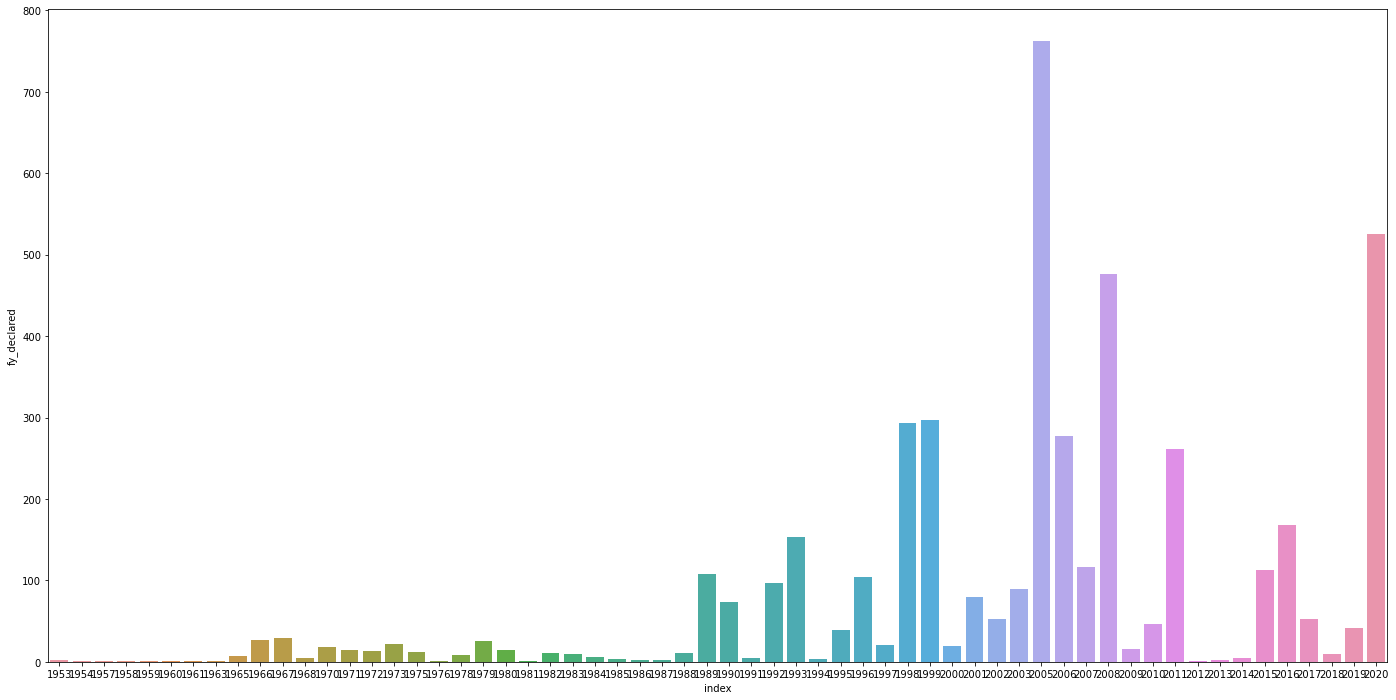

In [17]:
plt.pyplot.figure(figsize=(24,12))
sns.barplot(x='index',y='fy_declared',data=m.sort_values(by='fy_declared'));

# What is the reason of such a huge number of reports in 2020

In [18]:
df.query('state == "TX" & fy_declared=="2020"')['incident_type'].unique()

array(['Flood', 'Biological'], dtype=object)

## What are the most disaster prone designated areas?

In [19]:
print("Total Areas\n",df['designated_area'].nunique())

Total Areas
 2766


In [20]:
df[['designated_area','incident_type']].groupby('designated_area').count().sort_values(by='incident_type',ascending=False).head(10)

,incident_type
designated_area,
Statewide,511
Washington (County),508
Jefferson (County),462
Jackson (County),440
Franklin (County),437
Lincoln (County),394
Montgomery (County),349
Clay (County),346
Madison (County),334


From this we can see that TX as a state has encountered maximum natural disasters but the designated area -- Washington County that has encountered maximum natural disasters is not in TX. 

# Looking at the dates on which maximum Statewide Disasters were reported: 

In [21]:
d = pd.to_datetime(df['declaration_date']).dt
df['year'] = d.year
df['month'] = d.month
df['day'] = d.day
df['time'] = d.time
del df['declaration_date']

In [22]:
df['declaration_type'].value_counts()

DR    40820
EM    16882
FM     1690
Name: declaration_type, dtype: int64

In [23]:
df[['year','month','declaration_type']].groupby(['year','month']).describe()

declaration_type                 
                      count unique top  freq
year month                                  
1953 5                    3      1  DR     3
     6                    6      1  DR     6
     7                    1      1  DR     1
     10                   2      1  DR     2
     12                   1      1  DR     1
...                     ...    ...  ..   ...
2020 3                 5823      3  EM  3703
     4                 1952      1  DR  1952
     5                   62      3  DR    55
     6                   73      2  EM    65
     7                  208      3  DR   200

[686 rows x 4 columns]

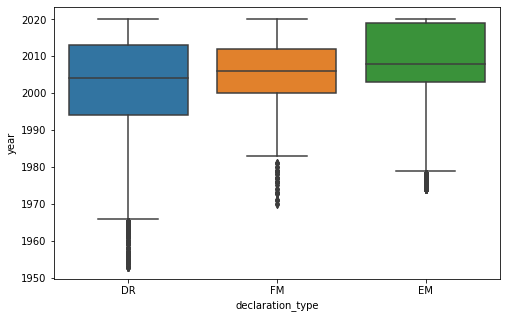

In [24]:
m=df[['year','declaration_type']]
plt.pyplot.figure(figsize=(8,5))
sns.boxplot(x='declaration_type',y='year',data=m);

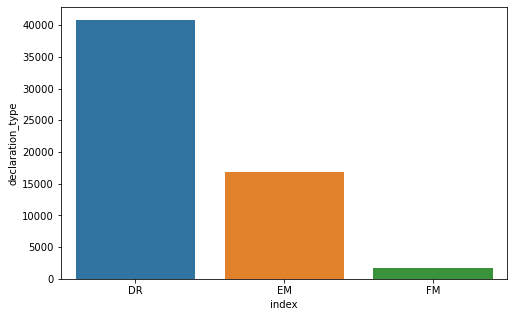

In [25]:
plt.pyplot.figure(figsize=(8,5))
sns.barplot(x='index',y='declaration_type',data=df['declaration_type'].value_counts().reset_index());

# Some Date-wise observations

In [26]:
m=df[['year','month','day','declaration_type']].groupby(['year','month','day']).count()
m.reset_index().sort_values(by='declaration_type',ascending=False)

,year,month,day,declaration_type
3022,2020,3,13,3703
1775,2005,9,11,777
3037,2020,4,4,739
1772,2005,9,5,646
1777,2005,9,13,615
...,...,...,...,...
1526,2002,6,11,1
1522,2002,6,6,1
1519,2002,6,1,1
1518,2002,5,29,1


2893 disasters were reported on 2020-03-13. Lets break up the date time features to make some new features. And let's see what happened on 13/03/20,13/01/1996,04/04/2020,11/9/2005

In [1]:
#13/03/20
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(2020,3,13))['declaration_title'].value_counts()

NameError: name 'df' is not defined

It seems like the maximum number of reports ever was on 13/03/2020 and the reason was obviously COVID-19 outbreak. Let's plot the number of corona reports in 2020 per state

In [4]:
m = df.query('year=="{0}" & declaration_title=="Covid-19"'.format(2020))
plt.pyplot.figure(figsize=(20,10))
sns.countplot(x='state',data=m.sort_values(by='time'));

NameError: name 'df' is not defined

In [29]:
#13/01/1996
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(1996,1,13))['declaration_title'].unique()

array(['Blizzard Of 96 (Severe Snow Storm)', 'Blizzard Of 96'],
      dtype=object)

In [30]:
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(2020,4,4))['declaration_title'].unique()

array(['Covid-19 Pandemic'], dtype=object)

In [31]:
#September 2005
m=df.query('year=="{0}" & month=="{1}"'.format(2005,9))
m['declaration_title'].value_counts()

Hurricane Katrina Evacuation    2602
Hurricane Rita                   637
Hurricane Katrina                231
Hurricane Katrina Evacuees        93
Hurricane Ophelia                 37
Tropical Storm Rita                4
Topanga Fire                       2
Sundevil Fire                      1
Name: declaration_title, dtype: int64

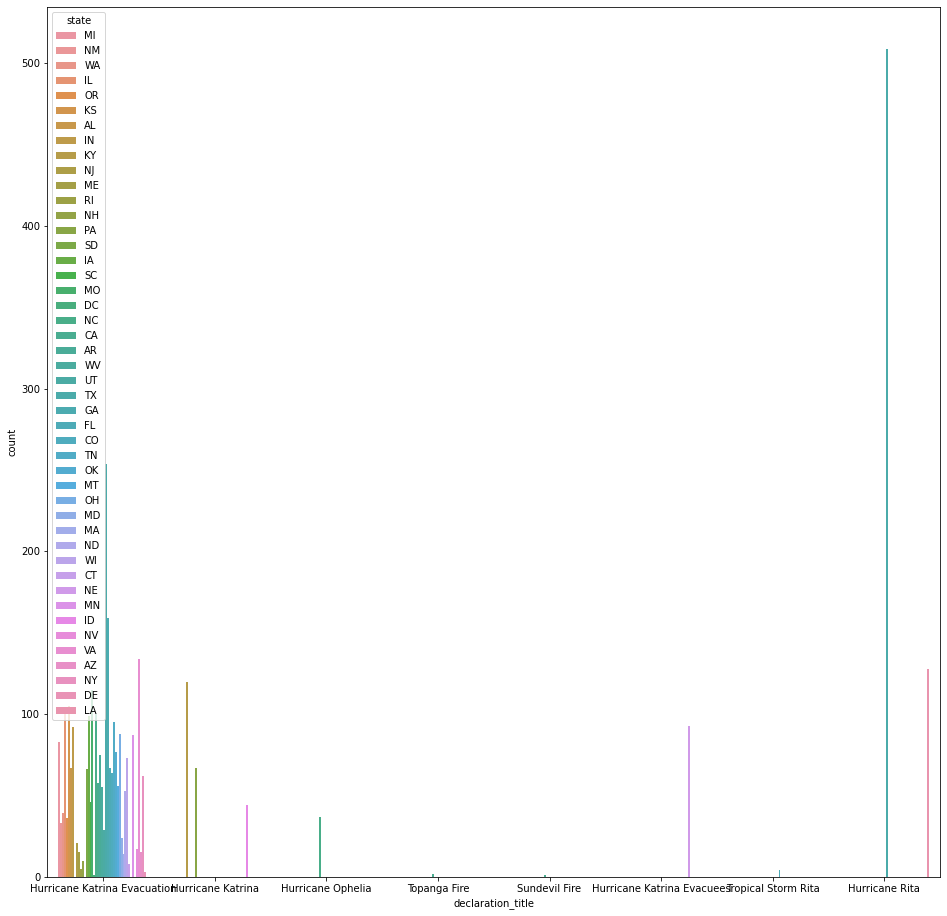

In [32]:
plt.pyplot.figure(figsize=(16,16))
sns.countplot(x='declaration_title',data=m.sort_values(by='time'),hue='state');

This is clear that all reported causes in 1996 were because of the blizzard of '96, and in 2020 major causes are flood and Covid 19
In september 2005 Howevr 3 hurricanes, and 2 tropical fires were the reason

# Let's get some insight into reports for which individual assistance or housing was not provided

In [33]:
m = df.query('ia_program_declared == "0" & ih_program_declared == "0" & pa_program_declared =="0"')
m['incident_type'].value_counts()

Severe Storm(s)     547
Hurricane            18
Severe Ice Storm      4
Biological            2
Flood                 1
Fire                  1
Coastal Storm         1
Name: incident_type, dtype: int64

These people were not provided individual assistance or any of the programs to be helped though they reported calamities, assuming they were ignored for reasons out of our analysis scope

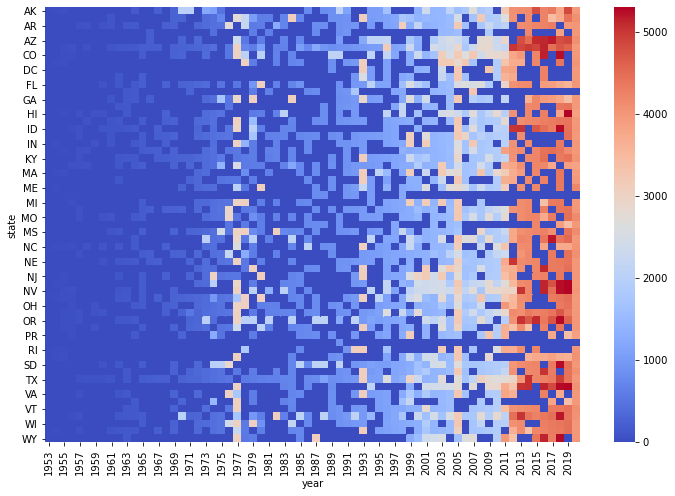

In [35]:
pt = df.pivot_table(values ='disaster_number', index = 'state', columns = 'year').fillna(0)
plt.pyplot.figure(figsize=(12,8))
sns.heatmap(pt, cmap='coolwarm');
plt.pyplot.savefig('heatmap.png')